In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [13]:
# Define the 3D object vertices and faces
vertices = np.array([[1, 1, 1], [1, 1, -1], [1, -1, -1], [1, -1, 1],
                     [-1, 1, 1], [-1, 1, -1], [-1, -1, -1], [-1, -1, 1]])
faces = np.array([[0, 1, 2, 3], [4, 5, 6, 7], [0, 4, 5, 1],
                  [1, 5, 6, 2], [2, 6, 7, 3], [4, 0, 3, 7]])

In [14]:
# Define the transformation matrices
scale_matrix = np.array([[1.5, 0, 0], [0, 1.5, 0], [0, 0, 1.5]])
rotation_matrix = np.array([[0.8, -0.6, 0], [0.6, 0.8, 0], [0, 0, 1]])
translation_matrix = np.array([3, 2, 1])

In [15]:
# Apply the transformations to the vertices
vertices = vertices.dot(scale_matrix).dot(rotation_matrix) + translation_matrix

In [16]:
# Append a column of ones to the vertices array
vertices_homogeneous = np.hstack((vertices, np.ones((vertices.shape[0], 1))))

In [18]:
# Define the projection matrices
parallel_proj_matrix = np.array([[1, 0, 0, 0], [0, 1, 0, 0], 
                                 [0, 0, 0, 0], [0, 0, 0, 1]])
perspective_proj_matrix = np.array([[1, 0, 0, 0], [0, 1, 0, 0], 
                                    [0, 0, 1, -10], [0, 0, 1/10, 0]])

In [19]:
# Apply the projection matrices to the vertices
parallel_proj_vertices = vertices_homogeneous.dot(parallel_proj_matrix.T)[:, :3]
perspective_proj_vertices = vertices_homogeneous.dot(perspective_proj_matrix.T)[:, :3]

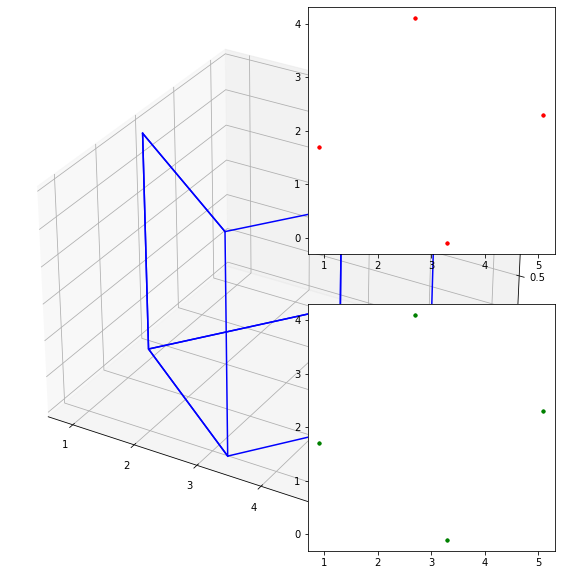

In [29]:
# Plot the 3D object and its projections
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the original 3D object
for face in faces:
    ax.plot(vertices[face, 0], vertices[face, 1], vertices[face, 2], color='blue')
    
    # Plot the parallel projection
ax2 = fig.add_subplot(222)
ax2.plot(parallel_proj_vertices[:, 0], parallel_proj_vertices[:, 1], '.', color='red')
ax2.set_aspect('equal')
# Plot the perspective projection
ax3 = fig.add_subplot(224)
ax3.plot(perspective_proj_vertices[:, 0], perspective_proj_vertices[:, 1], '.', color='green')
ax3.set_aspect('equal')

plt.show()